#  Create a quasi-mercator 1° grid

Advantage compared to a regular 1° grid: it remains more 
isotropic at high latitudes, while remaining reasonable in 
term of grid points area near the north pole. 


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#  1 degree in longitude, 
mylon=np.arange(0.5, 360.5, 1.0)
#   and in latitude, mercator grid 
#   until dy = delta_lat/3, dy = 1/3. afterwards. 
delta = 1.
jmax=160
lat=np.zeros(jmax); dy =np.zeros(jmax)
lat[0]=0
dy[0]=delta
for j in range(1,jmax) :
    dy[j]=np.max([delta/3.,delta*np.cos((lat[j-1]+delta/2.)*np.pi/180)])
    lat[j]=lat[j-1]+dy[j]
#  print(lat[jmax-30],lat[jmax-1]) # 80.04596420174046 89.71263086840699
latsouth=-lat[jmax-30:0:-1]
mylat = np.concatenate((latsouth,lat))
latsouth=-lat[jmax-30:0:-1]
mylat = np.concatenate((latsouth,lat))
print(len(mylon),len(mylat)) #  latitude points = 290 
#   plt.plot(mylat)

360 290


In [3]:
mylat

array([-80.0459642 , -79.71263087, -79.37929754, -79.0459642 ,
       -78.71263087, -78.37929754, -78.0459642 , -77.71263087,
       -77.37929754, -77.0459642 , -76.71263087, -76.37929754,
       -76.0459642 , -75.71263087, -75.37929754, -75.0459642 ,
       -74.71263087, -74.37929754, -74.0459642 , -73.71263087,
       -73.37929754, -73.0459642 , -72.71263087, -72.37929754,
       -72.0459642 , -71.71263087, -71.37929754, -71.0459642 ,
       -70.71263087, -70.37929754, -70.0459642 , -69.70734693,
       -69.36308222, -69.01308882, -68.65728503, -68.29558868,
       -67.9279172 , -67.55418766, -67.17431681, -66.78822112,
       -66.39581685, -65.99702008, -65.59174681, -65.17991295,
       -64.76143446, -64.33622736, -63.90420784, -63.46529232,
       -63.01939751, -62.56644053, -62.10633898, -61.639011  ,
       -61.16437543, -60.68235186, -60.19286075, -59.69582354,
       -59.19116275, -58.67880213, -58.15866675, -57.63068313,
       -57.0947794 , -56.55088542, -55.99893291, -55.43

In [3]:
#  compute latitude_bounds

mylat_b=np.zeros([len(mylat)+1])
#  mylat_b.shape  (to verify = 291
mylat_b[0]=mylat[0]-dy[jmax-30]*0.5
mylat_b[1:-1]=(mylat[0:-1]+mylat[1:])*0.5
mylat_b[-1]=mylat[-1]+dy[-1]*0.5
# print(mylat_b)
#
#  Compute the area
deg=111000. #  one degree in m at the equator
dlat = (mylat_b[1:]-mylat_b[0:-1])
myarea=np.tile(np.expand_dims(np.multiply(deg*dlat,deg*np.cos(np.pi/180.*mylat)),axis = 1),\
               [1,len(mylon)])
myarea.shape

(290, 360)

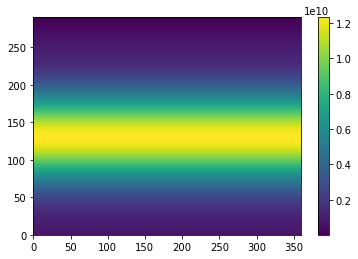

In [5]:
plt.pcolormesh(myarea)
plt.colorbar()
plt.show()

In [6]:
#  create grid dataset
#  suitable for xesmf regridding
#  write on disk 
globmerc1x1 = xr.Dataset({'lat' : (['lat'], mylat),
                     'lon'  : (['lon'], np.arange(0.5, 360.5, 1.0)),
                     'lon_b': (['lon_b'], np.arange(0. , 361, 1.0)),
                     'lat_b': (['lat_b'], mylat_b),
                     'tarea':(['lat','lon'],myarea)})
dirnc='/glade/work/treguier/INTERP'
globmerc1x1.to_netcdf(dirnc+'/grid_globmerc1x1.nc',mode='w')

In [8]:
#globmerc1x1.tarea.plot()
globmerc1x1.close()

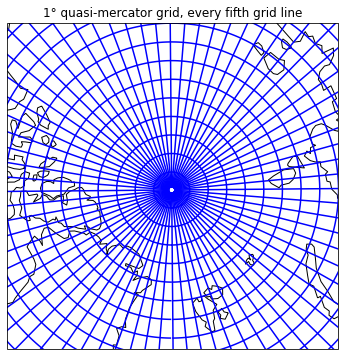

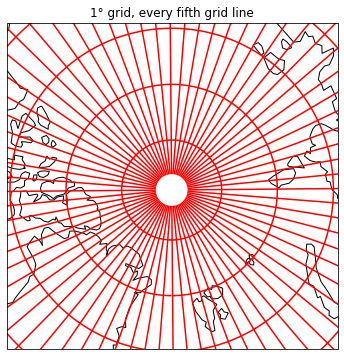

In [9]:
#  Check the Quasi-Mercator grid in the Arctic 
#  to be sure that it brings an improvement
lon2,lat2=np.meshgrid(mylon,mylat)
latreg1 = np.arange(0.5, 89.5, 1.0)

plt.figure(figsize=(6,6))
# plt.subplot(2,1,1)
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent((-180, 180, 75, 90), crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
# ax.gridlines()
for j in range(0,len(mylat),5) :
    plt.plot(lon2[j,:],lat2[j,:],'b',transform=ccrs.PlateCarree())             
for j in range(0,len(mylon),5) :
    plt.plot(lon2[:,j],lat2[:,j],'b',transform=ccrs.PlateCarree())  
plt.title('1° quasi-mercator grid, every fifth grid line')
plt.show()
# plt.subplot(2,1,2)
plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent((-180, 180, 75, 90), crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
# ax.gridlines()
for j in range(0,len(latreg1),5) :
    plt.plot(mylon[:],latreg1[j]*np.ones(len(mylon)),'r',transform=ccrs.PlateCarree())             
for j in range(0,len(mylon),5) :
    plt.plot(mylon[j]*np.ones(len(latreg1)),latreg1[:],'r',transform=ccrs.PlateCarree())  
plt.title('1° grid, every fifth grid line')
plt.show()